In [7]:
import os

import numpy as np
import pandas as pd
import torch

import scanpy as sc
from anndata import AnnData

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

data_dir="../../data/Mouse_brain/processed1/"
result_dir = "../edges/"
raw_type=False
use_edge=False
genes= torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")
print(genes)

sample='mouse1_slice201'

['1700022I11Rik', '1810046K07Rik', '5031425F14Rik', '5730522E02Rik', 'Acta2', 'Adam2', 'Adamts2', 'Adamts4', 'Adra1b', 'Alk', 'Ankfn1', 'Ano4', 'Aqp4', 'Asic4', 'B4galnt2', 'B4galnt3', 'Barx2', 'Bcl11b', 'Bdnf', 'Bgn', 'Blnk', 'Bmpr1b', 'Brinp3', 'C1ql3', 'C1qtnf7', 'Cacng5', 'Calb2', 'Camk2d', 'Car3', 'Cbln2', 'Cbln4', 'Ccbe1', 'Ccdc162', 'Ccdc3', 'Ccdc80', 'Ccnb1', 'Cd14', 'Cd24a', 'Cdca7', 'Cdcp1', 'Cdh12', 'Cdh13', 'Cdh20', 'Cdh9', 'Ceacam9', 'Cemip', 'Chat', 'Chn2', 'Chodl', 'Chrm2', 'Chrna2', 'Cldn5', 'Clrn1', 'Cntnap5b', 'Cobll1', 'Col14a1', 'Col15a1', 'Col23a1', 'Col24a1', 'Col25a1', 'Corin', 'Cplx3', 'Crhr2', 'Crispld2', 'Cspg4', 'Ctss', 'Cux2', 'Cxcl14', 'Daam2', 'Dmkn', 'Dnase1l3', 'Dscaml1', 'Egfem1', 'Egfr', 'Egln3', 'Egr2', 'Elfn1', 'Enpp6', 'Epha7', 'Fam19a2', 'Fam84b', 'Fbxl7', 'Fezf2', 'Flrt3', 'Flt1', 'Fndc7', 'Fosb', 'Foxp2', 'Frem2', 'Fst', 'Gfap', 'Glra1', 'Gpc6', 'Grik1', 'Grin3a', 'Grm1', 'Grm8', 'Hpse', 'Hs3st5', 'Igf2', 'Igfbp4', 'Igfbp5', 'Ikzf2', 'Il1rapl2', 

In [8]:
import matplotlib.pyplot as plt

# Set global font sizes using rcParams
plt.rcParams.update({
    'font.size': 18,            # Global font size
    'axes.titlesize': 20,       # Font size of the axes title
    'axes.labelsize': 20,       # Font size of the x and y labels
    'xtick.labelsize': 16,      # Font size of the x-tick labels
    'ytick.labelsize': 16,      # Font size of the y-tick labels
    'legend.fontsize': 18,      # Font size of the legend
    'figure.titlesize': 24      # Font size of the figure title
})

In [9]:
print("Robo1" in genes)

False


In [10]:
def read_data(sample,add_type_exp=False):
    results=torch.load(result_dir+"edges_"+sample+".pth",map_location=torch.device('cpu'))
    
    position_x=results["position_x"]
    position_y=results["position_y"]
    cell_type_name=results["cell_type_name"]
    loss1=results["loss_all"].cpu()
    
    B,N=position_x.shape
    loss1=loss1.numpy()
    
    cell_type_target=[cell_type_name[i][0] for i in range(len(cell_type_name))]

    type_exp_dict=np.load(data_dir + sample + "_TypeExp.npz", allow_pickle=True)
    type_exps=np.stack([type_exp_dict[cell_typei] for cell_typei in cell_type_target],axis=0)
    
    to_position_x=position_x[:,0].numpy()
    to_position_y=position_y[:,0].numpy()
    
    if not add_type_exp:
        adata = AnnData(results["y_pred"].numpy())#+type_exps)#(np.log(results["y_pred"].numpy()))
    else:
        adata = AnnData(results["y_pred"].numpy()+type_exps)
    adata.obs['cell type'] = cell_type_target
    adata.obs['to_position_x'] = to_position_x
    adata.obs['to_position_y'] = to_position_y
    adata.obs['loss']=loss1
    adata.var_names=genes

    if not add_type_exp:
        adata1 = AnnData(results["y"].numpy())#+type_exps)#(np.log(results["y"].numpy()))
    else:
        adata1 = AnnData(results["y"].numpy()+type_exps)#(np.log(results["y"].numpy()))
    adata1.obs['cell type'] = cell_type_target
    adata1.obs['to_position_x'] = to_position_x
    adata1.obs['to_position_y'] = to_position_y
    adata1.obs['loss']=loss1
    adata1.var_names=genes
    
    return adata,adata1

adata_pred,adata_y=read_data(sample)
adata_pred1,adata_y1=read_data(sample,True)
print(adata_y.shape)
print("mse",np.mean(np.square(adata_pred.X-adata_y.X)))
print("abs_mean",np.mean(np.abs(adata_pred.X)),np.mean(np.abs(adata_y.X)))
print("abs_median",np.median(np.abs(adata_pred.X)),np.median(np.abs(adata_y.X)))

(6137, 254)
mse 0.14346206
abs_mean 0.090758495 0.25083286
abs_median 0.036278553 0.10329637


0         L5 ET
1       L4/5 IT
2         other
3         L6 CT
4           OPC
         ...   
6132      L6 CT
6133    L5/6 NP
6134      Oligo
6135    L2/3 IT
6136      Lamp5
Name: cell type, Length: 6137, dtype: object


/gpfs/gibbs/project/wang_zuoheng/xx244/conda_envs/torch/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


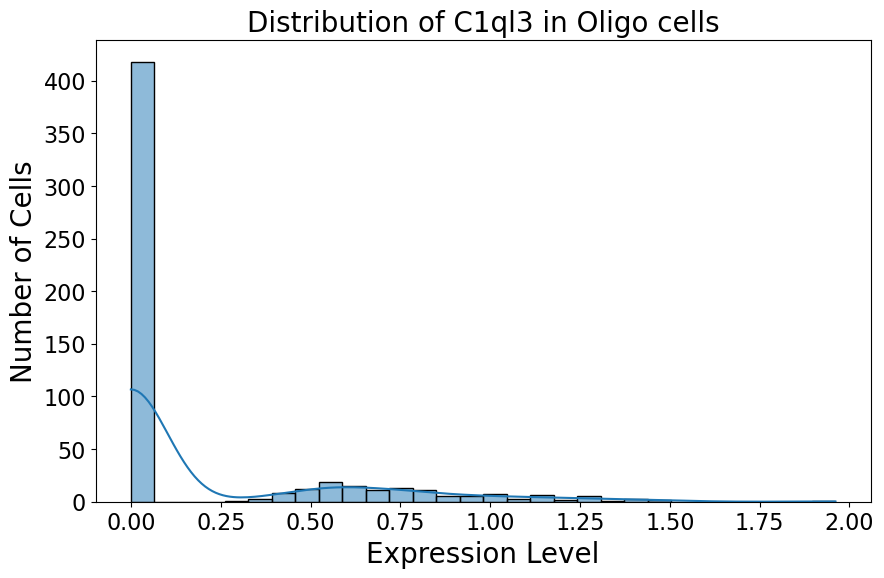

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gene_distribution(adata, cell_type, gene):
    """
    Plot the distribution of expression levels of a specific gene within a specific cell type.

    Parameters:
    - adata (anndata.AnnData): The AnnData object containing the gene expression data.
    - cell_type (str): The cell type to filter on.
    - gene (str): The gene to plot the distribution for.
    """
    # Check if the gene is in the columns of the adata
    if gene not in adata.var_names:
        print(f"Gene '{gene}' not found in the data.")
        return

    # Filter the data for the specified cell type
    print(adata.obs['cell type'])
    filtered_data = adata[adata.obs['cell type'] == cell_type]

    # Extract the expression levels of the gene
    gene_expression = filtered_data[:, gene].X
    
    # If the data is stored in a sparse format, convert it to dense
    if hasattr(gene_expression, "todense"):
        gene_expression = gene_expression.todense()
    
    # Flatten the array to 1D
    gene_expression = gene_expression.flatten()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.histplot(gene_expression, kde=True, bins=30)
    plt.title(f'Distribution of {gene} in {cell_type} cells')
    plt.xlabel('Expression Level')
    plt.ylabel('Number of Cells')
    plt.show()

plot_gene_distribution(adata_y1, "Oligo", "C1ql3")

In [12]:
from scipy.stats import pearsonr

def calculate_pcc_between_adata(adata1, adata2):
    # Extract data matrices
    X1 = adata1.X
    X2 = adata2.X
    
    # Calculate Pearson correlation coefficients
    pcc_results = {}
    for i, gene in enumerate(genes):
        # Extract the gene expression data across all cells for each gene
        gene_expression_1 = X1[:, i]
        gene_expression_2 = X2[:, i]
        
        # Calculate the Pearson correlation coefficient
        pcc, _ = pearsonr(gene_expression_1, gene_expression_2)
        
        # Store the result in the dictionary using the gene name as the key
        pcc_results[gene] = pcc
    
    return pcc_results

pccs_state=calculate_pcc_between_adata(adata_pred,adata_y)
pccs_overall=calculate_pcc_between_adata(adata_pred1,adata_y1)

In [18]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def calculate_pcc(adata1, adata2, gene_name):
    gene_expression1 = adata1.obs_vector(gene_name)
    gene_expression2 = adata2.obs_vector(gene_name)
    correlation_matrix = np.corrcoef(gene_expression1, gene_expression2)
    return correlation_matrix[0, 1]  # PCC between the two gene expressions

def spatial_visualize_gene_(adata, gene_name, is_pred, vmin, vmax, point_size=1, normalize_expression=False, colorbar_size=0.8):
    if gene_name not in adata.var_names:
        raise ValueError(f"Gene '{gene_name}' not found in adata.var_names")

    title = ""#"Predicted expression of " + gene_name if is_pred else "Expression of " + gene_name
    pcc1=pccs_overall[gene_name]
    pcc2=pccs_state[gene_name]
    if is_pred:
        title += f"\nOverall PCC: {pcc1:.2f}; Cell state PCC: {pcc2:.2f}"

    x = adata.obs['to_position_x']
    y = adata.obs['to_position_y']
    gene_expression = adata.obs_vector(gene_name)
    if normalize_expression:
        gene_expression = normalize_data(gene_expression)

    x_range = max(x) - min(x)
    y_range = max(y) - min(y)
    aspect_ratio = x_range / y_range
    fig_width = 10
    fig_height = fig_width / aspect_ratio

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))#
    scatter = ax.scatter(x, y, c=gene_expression, cmap='jet', vmin=vmin, vmax=vmax, s=point_size)
    cbar = plt.colorbar(scatter, ax=ax, shrink=colorbar_size)
    ax.set_title(title)
    ax.set_aspect('equal')
    plt.xlabel("Spatial x")
    plt.ylabel("Spatial y")

    path="./figures/"
    flag=str(is_pred)
    path=path+gene_name+flag+"_pred.pdf"
    plt.savefig(path, bbox_inches='tight')
    plt.show()

def spatial_visualize_gene(adata_pred, adata_y, gene_name, normalize_expression=False, colorbar_size=0.8):
    ground_truth_values = adata_y.obs_vector(gene_name)
    if normalize_expression:
        vmin, vmax = 0, 1
    else:
        vmin, vmax = ground_truth_values.min(), ground_truth_values.max()

    pcc = calculate_pcc(adata_pred, adata_y, gene_name)
    print("real",gene_name)
    spatial_visualize_gene_(adata_y, gene_name, False, vmin, vmax, normalize_expression=normalize_expression, colorbar_size=colorbar_size)
    print("pred",gene_name)
    spatial_visualize_gene_(adata_pred, gene_name, True, vmin, vmax, normalize_expression=normalize_expression, colorbar_size=colorbar_size)

print(adata_pred.var_names)

Index(['1700022I11Rik', '1810046K07Rik', '5031425F14Rik', '5730522E02Rik',
       'Acta2', 'Adam2', 'Adamts2', 'Adamts4', 'Adra1b', 'Alk',
       ...
       'Gad2', 'Tac2', 'Lamp5', 'Cnr1', 'Pvalb', 'Sst', 'Rab3b', 'Slc17a7',
       'Penk', 'Gad1'],
      dtype='object', length=254)


real Rorb


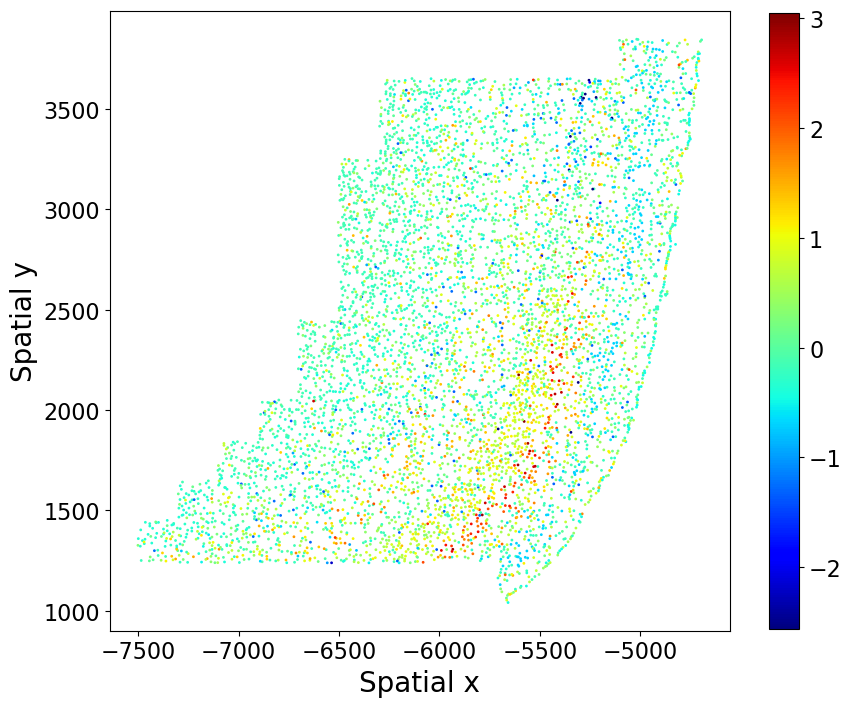

pred Rorb


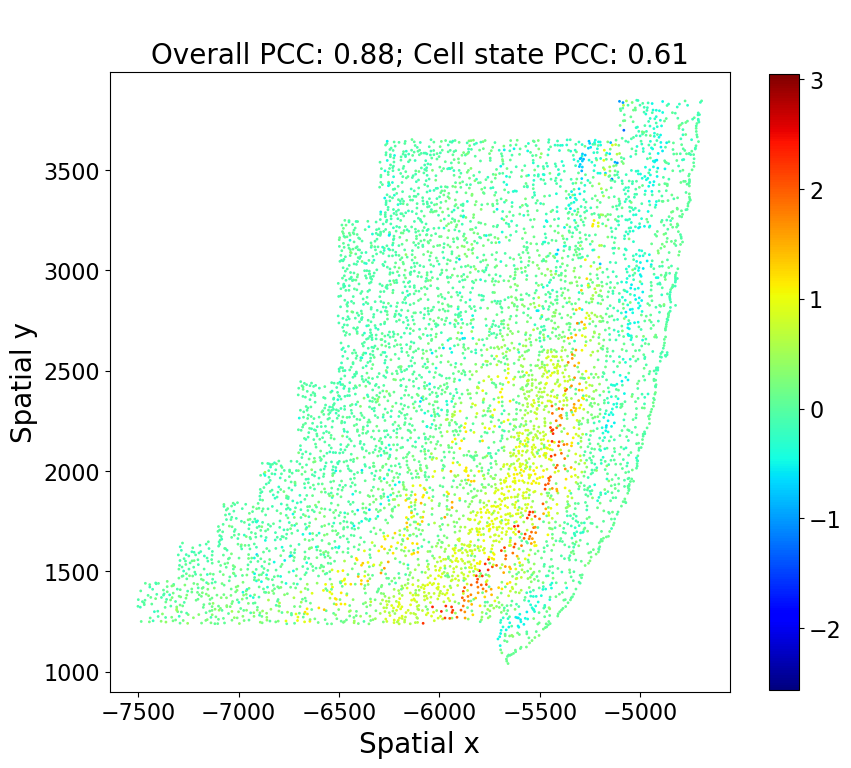

real Gfap


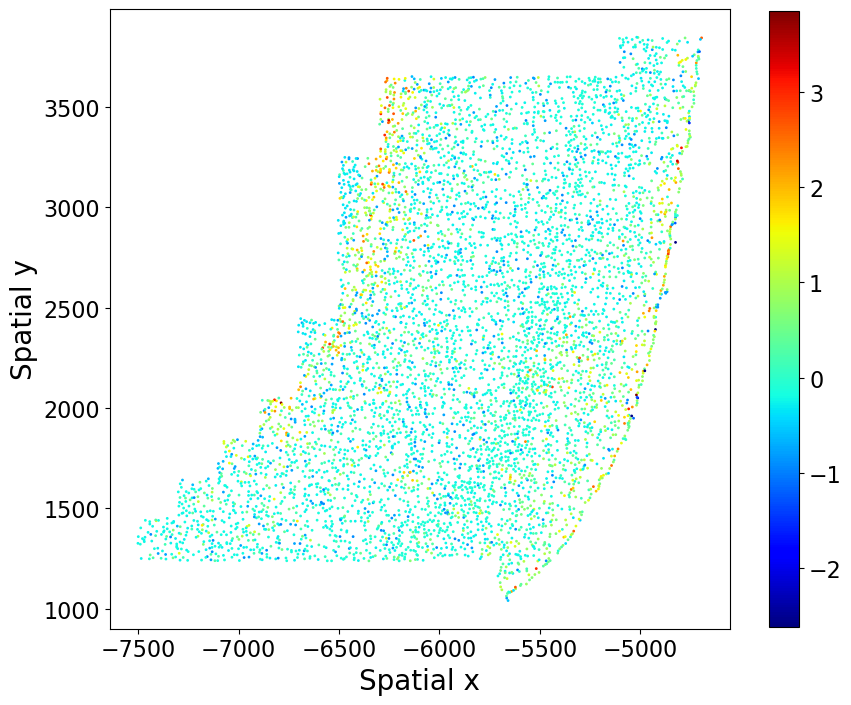

pred Gfap


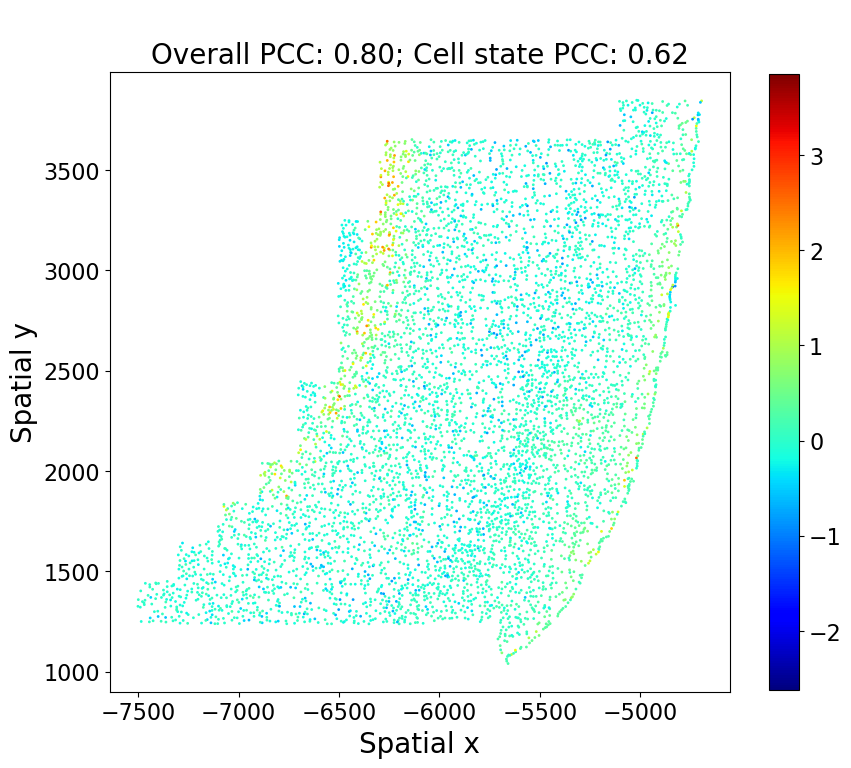

real Cux2


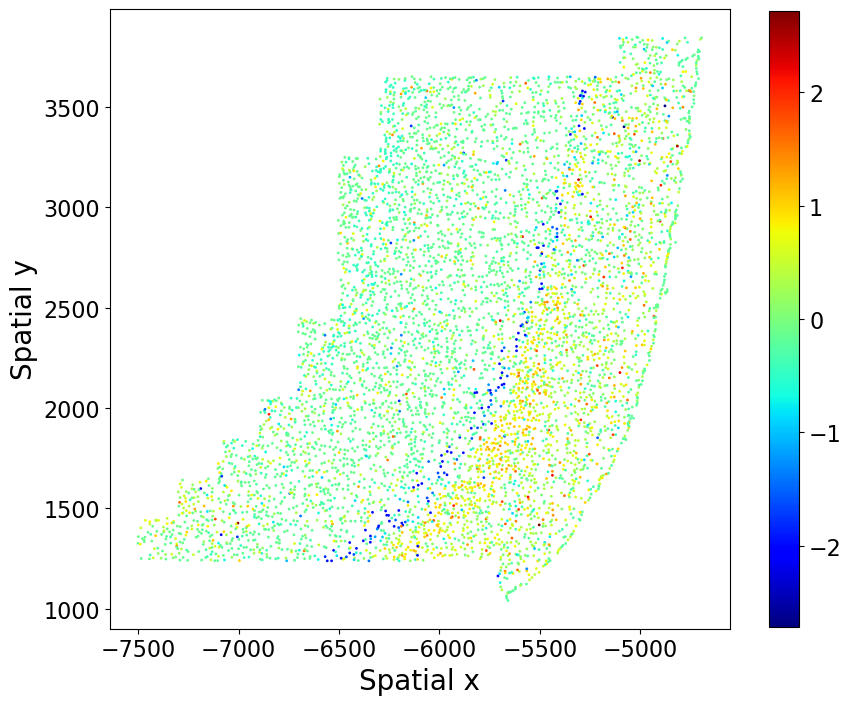

pred Cux2


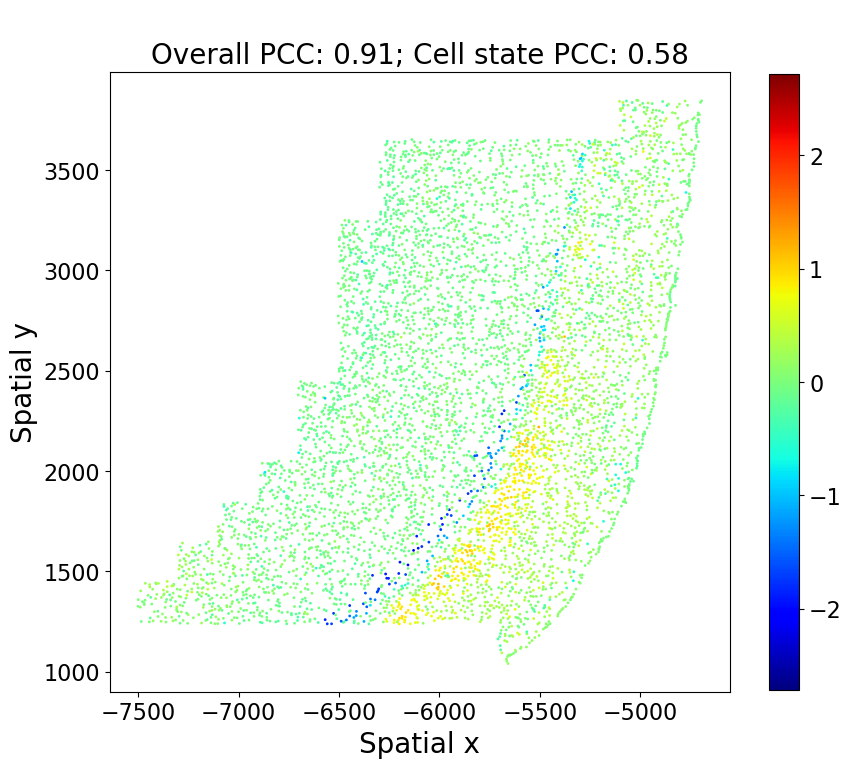

In [16]:
for genei in ['Rorb','Gfap','Cux2']:
    spatial_visualize_gene(adata_pred, adata_y, genei, normalize_expression=False, colorbar_size=0.8)

real Rorb


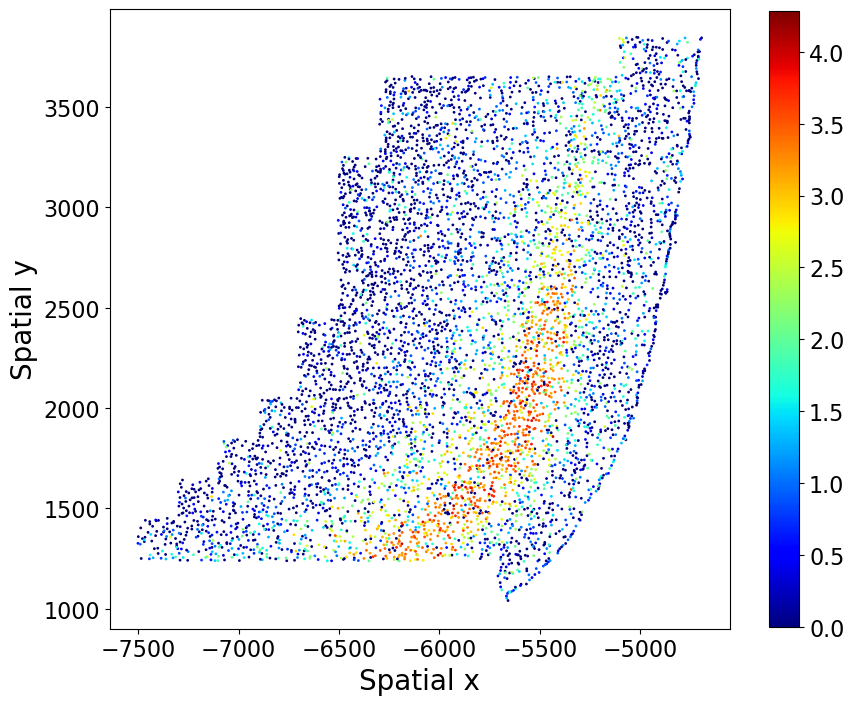

pred Rorb


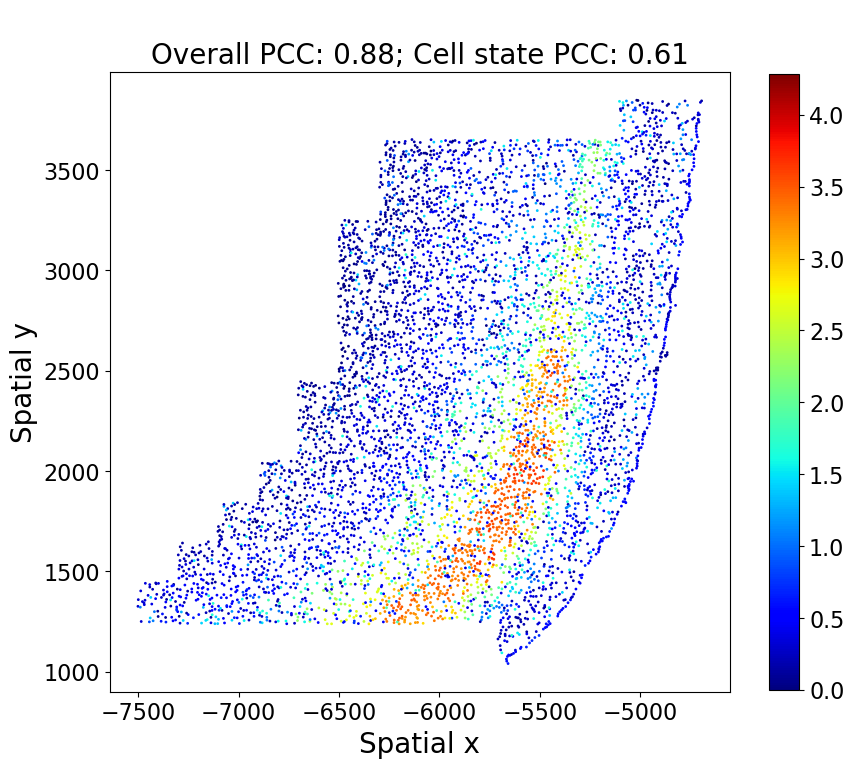

real Gfap


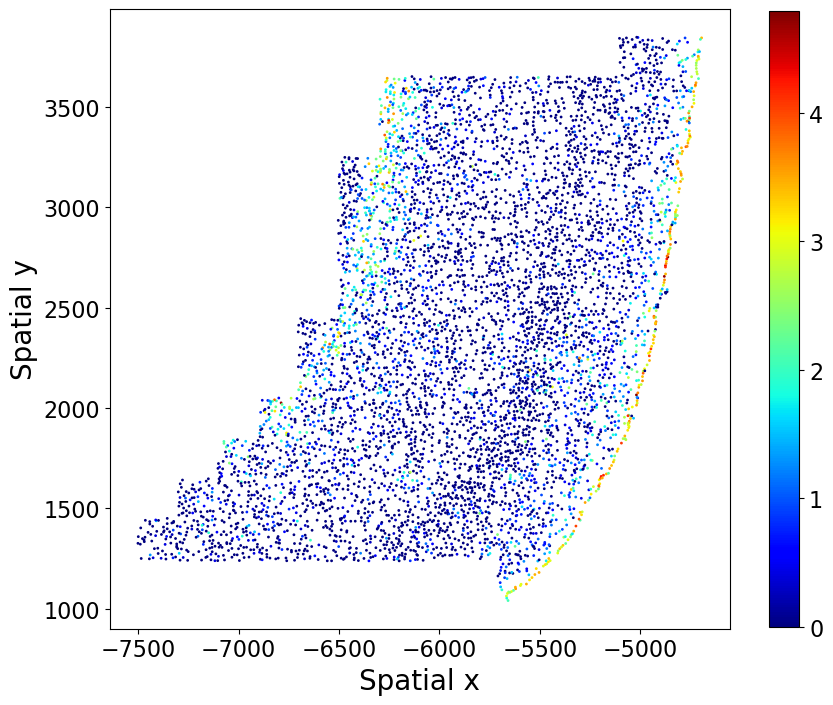

pred Gfap


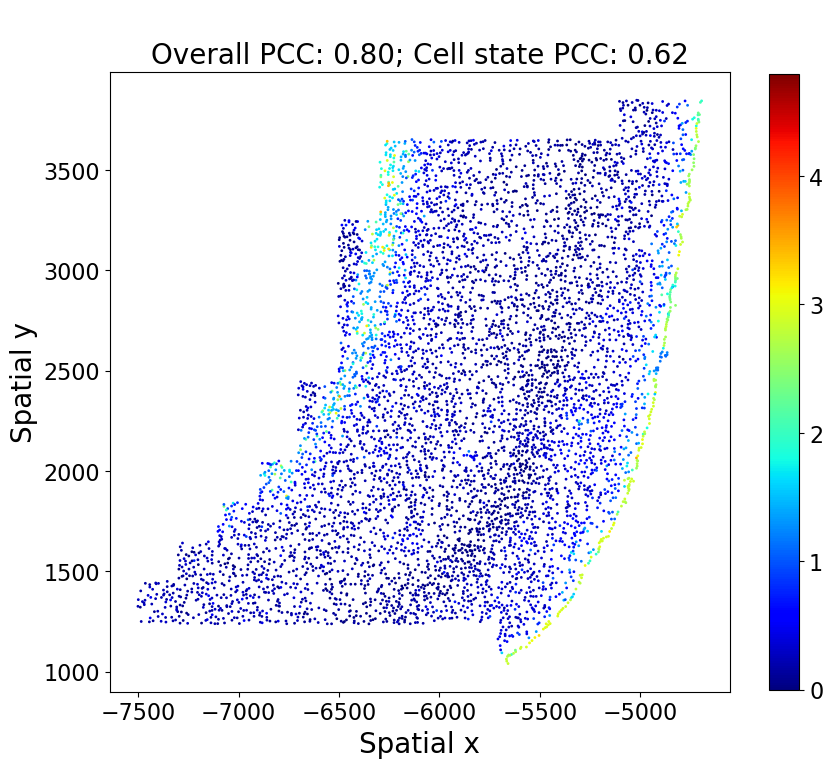

real Cux2


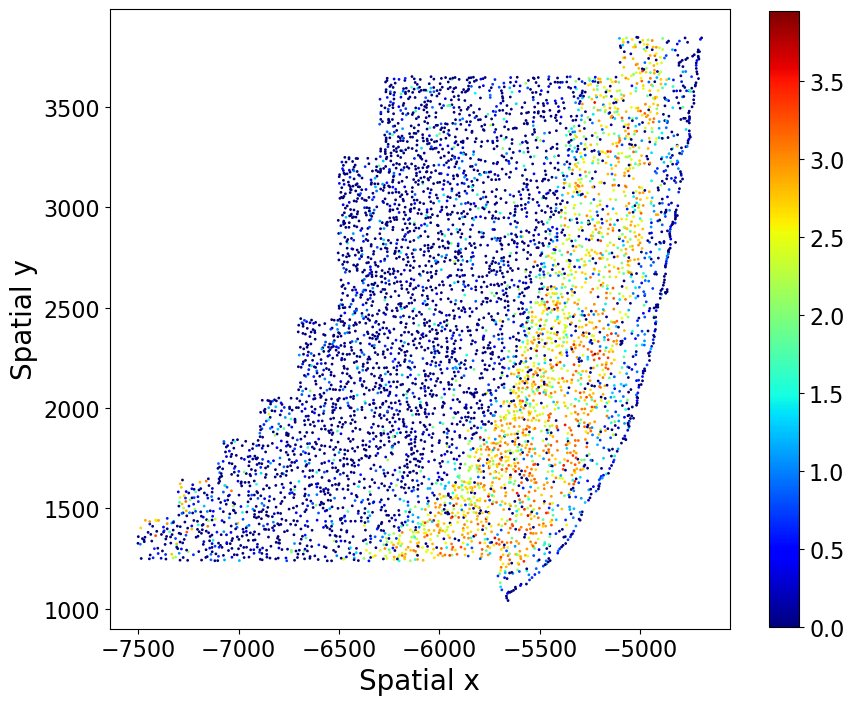

pred Cux2


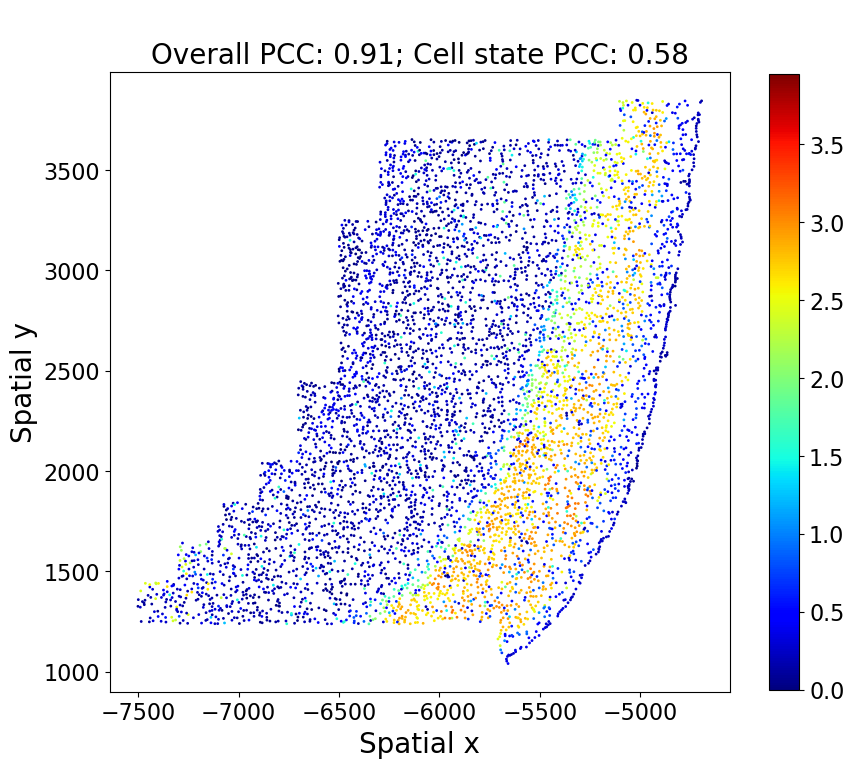

In [19]:
for genei in ['Rorb','Gfap','Cux2']:
    spatial_visualize_gene(adata_pred1, adata_y1, genei, normalize_expression=False, colorbar_size=0.8)

['Rspo1', 'C1ql3', 'Sulf2', 'Adra1b', 'Cbln2', 'Gfap', 'Slc17a7', 'Rorb', 'Slc17a6', 'Thsd7a', 'Chrm2', 'Igfbp5', 'Otof', 'Spon1', 'Cux2', 'Cbln4', 'Wnt7b', 'Tox', 'Camk2d', 'Lamp5', 'Trp53i11', 'Sulf1', 'Prss12', 'Cdh13', 'Fam19a2', 'St6galnac5', 'Calb1', 'Pld5', 'Npnt', 'Nos1', 'Unc5d', 'Pvalb', 'Ptpru', 'Shisa9', 'Tac2', 'Ccdc3', 'Fezf2', 'Plcxd3', 'Marcksl1', 'Brinp3', 'Cdh12', 'Il1rapl2', 'Igfbp4', 'Syndig1', 'Lypd1', 'Kcng1', 'Wipf3', 'Ptprt', 'Ptprm', 'Grm1', 'Trpc6', 'Tenm3', 'Slc30a3', 'Rab3b', 'Barx2', 'Grik1', 'Pde11a', 'Meis2', 'Sema5a', 'Col25a1', 'Reln', 'Parm1', 'Iqgap2', 'Grm8', 'Tcap', 'Pou3f3', 'Vip', 'Gad2', 'Dscaml1', 'Cnr1', 'Pou3f1', 'Prss23', 'Prr16', 'Lama3', 'Cdh20', 'Luzp2', 'Rnf152', 'Chn2', 'Cdh9', 'Sst', 'Cntnap5b', 'Rxfp1', 'Th', 'Olfm3', 'Ptprk', 'Prdm8', 'Hpse', 'Cxcl14', 'Oprk1', 'Bcl11b', 'Rgs6', 'Nr4a2', 'Grin3a', 'Cemip', 'Pcdh8', 'Ntng2', 'Gpc6', 'Egln3', 'Cplx3', 'Blnk', 'Rxfp2', 'Lsp1', 'Slc17a8', 'Daam2', 'Sertm1', 'Aqp4', 'Ccdc80', 'Thbs2', 'Igf

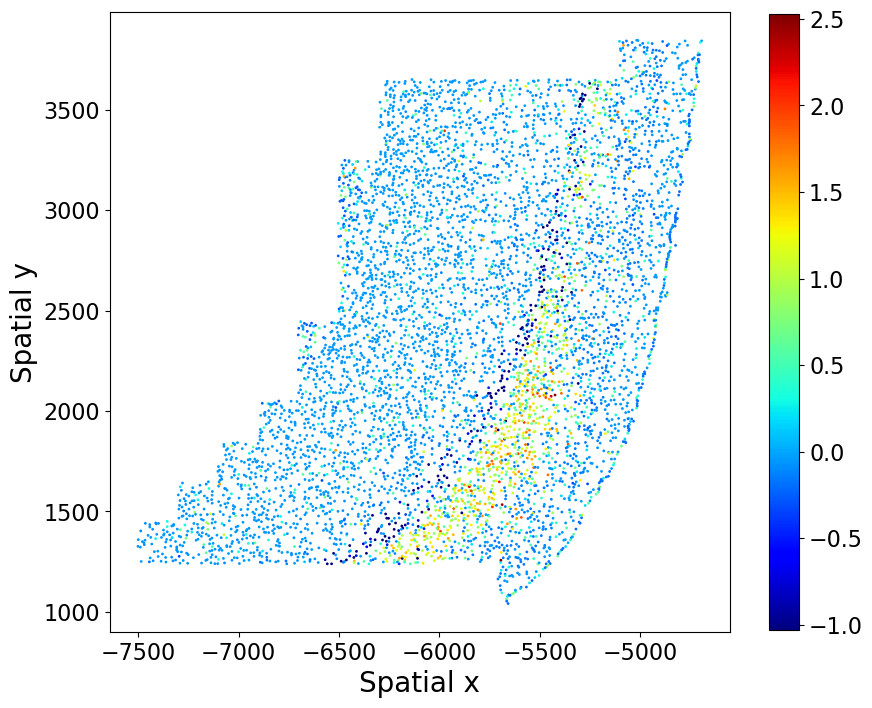

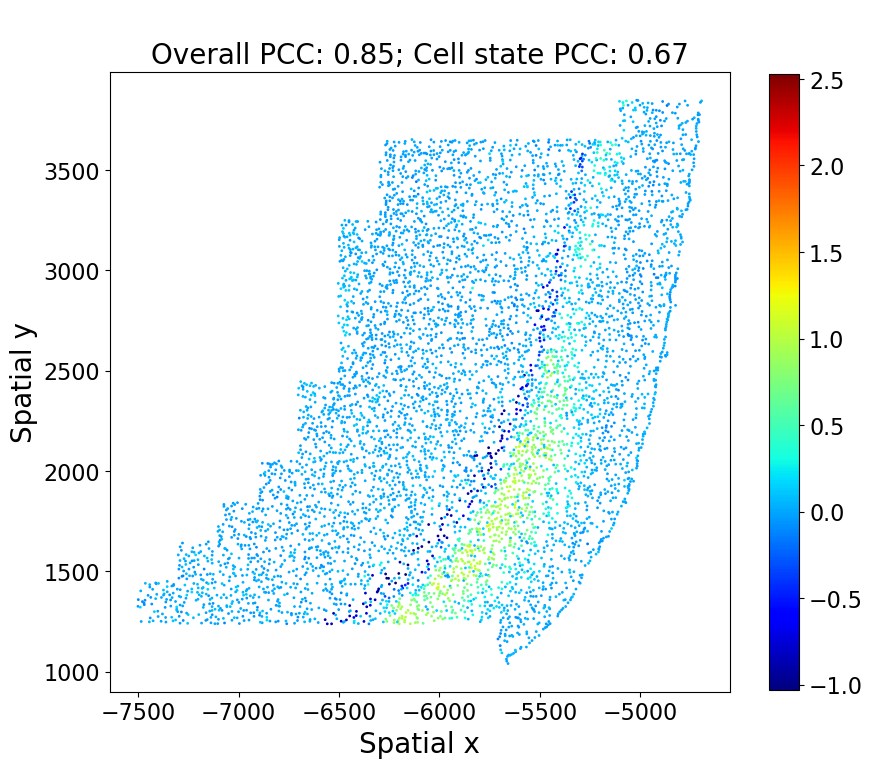

Plotting C1ql3 with PCC: 0.66


KeyboardInterrupt: 

In [10]:
def find_top_genes_by_pcc(adata1, adata2, top_n=6):
    pcc_dict = {}
    for gene in adata1.var_names:
        pcc = calculate_pcc(adata1, adata2, gene)
        pcc_dict[gene] = pcc

    # Sort genes by their PCC in descending order and select top_n genes
    print(sorted(pcc_dict, key=pcc_dict.get, reverse=True))
    top_genes = sorted(pcc_dict, key=pcc_dict.get, reverse=True)[:top_n]
    print(top_genes)
    return top_genes

def plot_top_genes(adata_pred, adata_ground, top_n=20, normalize_expression=False, colorbar_size=0.8):
    top_genes = find_top_genes_by_pcc(adata_pred, adata_ground, top_n=top_n)#+["Bdnf","Chat","Gad1"]
    for gene in top_genes:
        print(f"Plotting {gene} with PCC: {calculate_pcc(adata_pred, adata_ground, gene):.2f}")
        spatial_visualize_gene(adata_pred, adata_ground, gene, normalize_expression=normalize_expression, colorbar_size=colorbar_size)

plot_top_genes(adata_pred,adata_y)

In [ ]:
plot_top_genes(adata_pred1,adata_y1)

In [ ]:
genes1=['Rspo1', 'C1ql3', 'Sulf2', 'Adra1b', 'Cbln2', 'Gfap', 'Slc17a7', 'Rorb', 'Slc17a6', 'Thsd7a', 'Chrm2', 'Igfbp5', 'Otof', 'Spon1', 'Cux2', 'Cbln4', 'Wnt7b', 'Tox', 'Camk2d', 'Lamp5', 'Trp53i11', 'Sulf1', 'Prss12', 'Cdh13', 'Fam19a2', 'St6galnac5', 'Calb1', 'Pld5', 'Npnt', 'Nos1', 'Unc5d', 'Pvalb', 'Ptpru', 'Shisa9', 'Tac2', 'Ccdc3', 'Fezf2', 'Plcxd3', 'Marcksl1', 'Brinp3', 'Cdh12', 'Il1rapl2', 'Igfbp4', 'Syndig1', 'Lypd1', 'Kcng1', 'Wipf3', 'Ptprt', 'Ptprm', 'Grm1', 'Trpc6', 'Tenm3', 'Slc30a3', 'Rab3b', 'Barx2', 'Grik1', 'Pde11a', 'Meis2', 'Sema5a', 'Col25a1', 'Reln', 'Parm1', 'Iqgap2', 'Grm8', 'Tcap', 'Pou3f3', 'Vip', 'Gad2', 'Dscaml1', 'Cnr1', 'Pou3f1', 'Prss23', 'Prr16', 'Lama3', 'Cdh20', 'Luzp2', 'Rnf152', 'Chn2', 'Cdh9', 'Sst', 'Cntnap5b', 'Rxfp1', 'Th', 'Olfm3', 'Ptprk', 'Prdm8', 'Hpse', 'Cxcl14', 'Oprk1', 'Bcl11b', 'Rgs6', 'Nr4a2', 'Grin3a', 'Cemip', 'Pcdh8', 'Ntng2', 'Gpc6', 'Egln3', 'Cplx3', 'Blnk', 'Rxfp2', 'Lsp1', 'Slc17a8', 'Daam2', 'Sertm1', 'Aqp4', 'Ccdc80', 'Thbs2', 'Igf2', 'Mrc1', 'Ankfn1', 'Penk', 'Cd14', 'Cd24a', 'Tunar', 'Nr4a1', 'Pou6f2', 'Itgb8', 'Bmpr1b', '1-Mar', 'Rgs5', 'Bdnf', 'Alk', 'Sema3e', 'Satb2', 'Col24a1', 'Enpp6', 'Rfx3', 'Asic4', 'Serpinf1', 'Nr2f2', 'Bgn', 'Syt6', 'Unc5b', 'Plch1', 'Flrt3', 'Ust', 'Npy2r', 'Vtn', 'Osr1', 'Col23a1', 'Foxp2', 'Unc13c', 'Gad1', 'Tmem163', 'Epha7', 'Nxph1', 'Ano4', 'Nkain3', 'Cldn5', 'Npas1', 'Ptger3', 'Col15a1', 'Egfr', 'Ubash3b', 'Ccbe1', 'Cacng5', 'Timp3', 'Hs3st5', 'Flt1', 'Fst', 'Slco5a1', 'Sox10', 'Syt10', 'Prox1', 'Zfp804b', 'Elfn1', 'Tshz2', 'Rerg', 'Adamts4', 'Inpp4b', 'Nxph4', 'Tmtc2', 'Moxd1', 'Tbc1d4', 'Tnfaip6', 'Nxph2', 'Ramp1', 'Plekhg3', 'Egfem1', 'Calb2', 'Slc32a1', 'Acta2', 'Trpc4', 'Crispld2', 'Sox6', 'Slc25a13', 'Cspg4', 'Pdgfc', 'Myh14', 'Lmo1', 'Cobll1', 'Phactr2', 'Ikzf2', 'Chodl', 'Vwc2', 'Teddm3', 'Ndst4', 'Fam84b', 'Adamts2', 'Pdgfra', 'Fosb', 'Slc44a5', 'Glra1', 'Pdlim5', 'L3mbtl4', 'Dmkn', 'Frem2', 'Pxdc1', 'Col14a1', 'Fbxl7', 'Nhs', 'Opalin', 'Sgcd', 'Ctss', 'Egr2', 'Lhx6', 'Crhr2', 'B4galnt3', 'Chrna2', 'C1qtnf7', 'Corin', 'Cdca7', 'Npsr1', 'Il4ra', 'Ceacam9', 'Ror1', 'Sncg', '5730522E02Rik', 'Chat', 'Clrn1', 'Vipr2', 'Ccnb1', 'Olah', 'Car3', 'Kcnj8', 'Sp8', 'Muc20', '1810046K07Rik', 'Prokr2', 'Scgn', 'B4galnt2', 'Ccdc162', 'Nnmt', 'Lyzl4', 'Adam2', 'Prok2', 'Ltf', 'Dnase1l3', '5031425F14Rik', '1700022I11Rik', 'Cdcp1', 'Mrgprx2', 'Fndc7']

genes2=['Slc17a7', 'Sox10', 'Satb2', 'Syt6', 'Slc30a3', 'Cux2', 'Gad1', 'Slc32a1', 'Bcl11b', 'Foxp2', 'Plekhg3', 'Vtn', 'Unc5d', 'Cldn5', 'Wipf3', 'Flt1', 'C1ql3', 'Unc5b', 'Rorb', 'Lamp5', 'Cspg4', 'Igf2', 'Adamts4', 'Rab3b', 'Syndig1', 'Cdh12', 'Prox1', 'Sulf2', 'Nxph1', 'Opalin', 'Rspo1', 'Fam19a2', 'Lhx6', 'Calb1', 'Igfbp4', 'Bgn', 'Nxph4', 'Ptprt', 'Slc17a6', 'Prdm8', 'Gad2', 'Sst', 'Ptprk', 'Fezf2', 'Grm8', 'Daam2', 'Meis2', 'Cplx3', 'Trp53i11', 'Gfap', 'Cbln2', 'Rnf152', 'Kcnj8', 'Cnr1', 'Pdgfra', 'Rgs6', 'Grm1', 'Sema5a', 'Thsd7a', 'Cdh9', 'Dscaml1', 'Epha7', 'Cobll1', 'Prr16', 'Reln', 'Sulf1', 'Pvalb', 'Vip', 'Chrm2', 'Prss12', 'Adra1b', 'Cdh13', 'Sertm1', 'Iqgap2', 'Tenm3', 'Nr2f2', 'Timp3', 'Otof', 'Npnt', 'Kcng1', 'Asic4', 'Shisa9', 'Pde11a', 'Ano4', 'Tmem163', 'Spon1', 'Parm1', 'Elfn1', 'Prss23', 'Nr4a2', 'Cbln4', 'Pou3f3', 'Ptpru', 'Grik1', 'Aqp4', 'Ptprm', 'Tox', 'Penk', 'Camk2d', 'Cd14', 'Tac2', 'Igfbp5', 'Ubash3b', 'Rgs5', 'Nr4a1', 'Ntng2', 'Ctss', 'Sox6', 'Plcxd3', 'Brinp3', 'Olfm3', 'Grin3a', 'Enpp6', 'Pcdh8', 'Cemip', 'Egfr', 'Serpinf1', 'St6galnac5', 'Cxcl14', 'Rerg', 'Pou3f1', 'Pld5', 'Rxfp1', 'Oprk1', 'Lama3', 'Myh14', 'Trpc4', 'Trpc6', 'Tnfaip6', 'Blnk', 'Cdh20', 'Chn2', 'Flrt3', 'Wnt7b', 'Luzp2', 'Col25a1', 'Lypd1', 'Nos1', 'Cntnap5b', 'Il1rapl2', 'Tshz2', 'Tunar', 'Pou6f2', 'Alk', 'Npas1', 'Hs3st5', 'Itgb8', 'Inpp4b', 'Barx2', 'Cacng5', 'Marcksl1', '1-Mar', 'Rfx3', 'Cd24a', 'Bmpr1b', 'Ramp1', 'Acta2', 'Ccdc3', 'Osr1', 'Bdnf', 'Ust', 'Slc17a8', 'Ccbe1', 'Fam84b', 'Vwc2', 'Nhs', 'Gpc6', 'Egln3', 'Col24a1', 'Pdlim5', 'Tbc1d4', 'Slc25a13', 'Ccdc80', 'Unc13c', 'Syt10', 'Calb2', 'Plch1', 'Col23a1', 'Sema3e', 'Tcap', 'Moxd1', 'Npy2r', 'Thbs2', 'Tmtc2', 'Lsp1', 'Nkain3', 'Crispld2', 'Frem2', 'Rxfp2', 'Fst', 'Sncg', 'Th', 'Mrc1', 'Hpse', 'Egfem1', 'Pxdc1', 'Il4ra', 'Fosb', 'Sp8', 'Col15a1', 'Ankfn1', 'Slco5a1', 'Slc44a5', 'Adamts2', 'Teddm3', 'Ptger3', 'Pdgfc', 'Zfp804b', 'Nxph2', 'Vipr2', 'Chat', 'Ikzf2', 'Phactr2', 'Col14a1', 'B4galnt3', 'Ror1', 'Dmkn', 'Fbxl7', 'Sgcd', 'C1qtnf7', 'Ceacam9', 'Egr2', 'Glra1', 'Lmo1', 'Chrna2', 'Cdca7', 'Car3', 'Chodl', 'Ndst4', 'Npsr1', 'Corin', 'Crhr2', '5730522E02Rik', 'L3mbtl4', 'Olah', 'Lyzl4', '1810046K07Rik', 'Scgn', 'Ccdc162', 'Nnmt', 'Clrn1', 'Prokr2', 'Ltf', 'Muc20', 'Cdcp1', 'B4galnt2', 'Ccnb1', 'Adam2', '5031425F14Rik', 'Prok2', 'Fndc7', '1700022I11Rik', 'Dnase1l3', 'Mrgprx2']

both_good_genes=list(set(genes1[:60]).intersection(set(genes2[:60])))
print(both_good_genes)

In [ ]:
for genei in both_good_genes:
    spatial_visualize_gene(adata_pred1, adata_y1, genei, normalize_expression=False, colorbar_size=0.8)

In [ ]:
spatial_visualize_gene(adata_pred1, adata_y1, "Gfap", normalize_expression=False, colorbar_size=0.8)
spatial_visualize_gene(adata_pred, adata_y, "Gfap", normalize_expression=False, colorbar_size=0.8)

In [ ]:
for genei in ['Rorb','Gfap','Sulf2','Cux2','Nos1']:
    spatial_visualize_gene(adata_pred1, adata_y1, genei, normalize_expression=False, colorbar_size=0.8)

In [ ]:
for genei in ['Gfap','Rorb','Trp53i11','Sulf2','Rspo1','Fezf2','Grm2']:
    spatial_visualize_gene(adata_pred, adata_y, genei, normalize_expression=False, colorbar_size=0.8)